In [5]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target # Add the target column (0=malignant, 1=benign)

print("Breast Cancer dataset loaded successfully.")
print(df.head())

Breast Cancer dataset loaded successfully.
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  wo

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Only transform the test set

print("\nData split and scaled.")


Data split and scaled.


In [8]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("✅ Logistic Regression model trained.")

✅ Logistic Regression model trained.


C:\Users\ASHOK KUMAR\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(



--- Confusion Matrix ---
[[ 63   0]
 [108   0]]


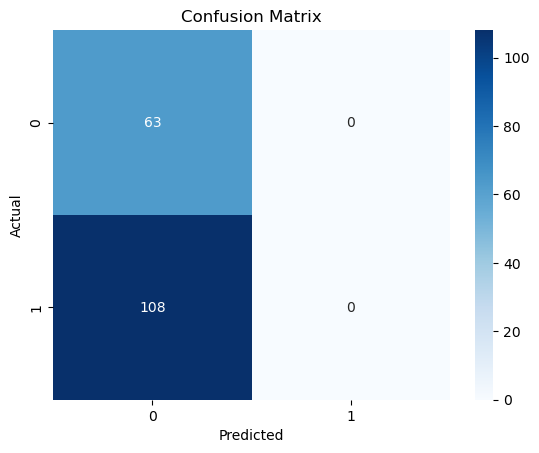


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.37      1.00      0.54        63
           1       0.00      0.00      0.00       108

    accuracy                           0.37       171
   macro avg       0.18      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171


ROC-AUC Score: 1.00


C:\Users\ASHOK KUMAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASHOK KUMAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASHOK KUMAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


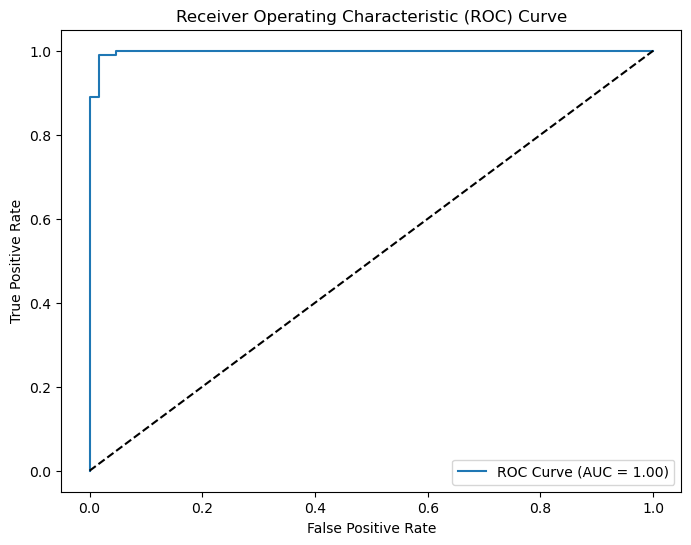

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the scaled test data
y_pred = model.predict(X_test)

# --- Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(conf_matrix)

# For a nicer visual
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# --- Precision, Recall, F1-Score ---
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# --- ROC-AUC Curve ---
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nROC-AUC Score: {auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [9]:

probabilities = model.predict_proba(X_test_scaled)[:, 1]

custom_threshold = 0.4
custom_predictions = (probabilities >= custom_threshold).astype(int)

print("\n--- Evaluation with Custom Threshold (0.4) ---")
print(classification_report(y_test, custom_predictions))


--- Evaluation with Custom Threshold (0.4) ---
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

